<a href="https://colab.research.google.com/github/brunoras/galapagos_dice/blob/main/Fairness_of_my_Gal%C3%A1pagos_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import collections
import matplotlib.pyplot as plt

# Samples

In [ ]:
plus = {}
minus = {}

In [ ]:
# Sample 0
plus[0] = [2, 6, 6, 5, 4, 3, 6, 6, 4, 3,
           6, 4, 1, 5, 3, 2, 6, 6, 4, 4,
           5, 4, 6, 3, 5, 4, 3, 2, 4, 5]

minus[0] = [3, 1, 6, 6, 6, 5, 2, 2, 1, 3,
            2, 3, 5, 5, 6, 3, 1, 6, 6, 1,
            4, 1, 5, 5, 2, 2, 1, 4, 3, 3]

In [ ]:
# Sample 1
plus[1] = [3, 6, 3, 1, 4, 4, 1, 4, 1, 5, 
           6, 6, 1, 4, 6, 5, 2, 6, 3, 5,
           1, 4, 6, 5, 1, 2, 2, 6, 3, 2]

minus[1] = [3, 3, 6, 4, 1, 4, 1, 5, 1, 4, 
            6, 3, 5, 4, 5, 5, 3, 5, 2, 1,
            2, 3, 2, 6, 5, 4, 2, 2, 1, 5]

In [ ]:
# Sample 2
plus[2] = [6, 5, 2, 3, 2, 3, 4, 1, 5, 6,
           5, 3, 2, 3, 5, 3, 4, 6, 4, 2,
           2, 2, 1, 6, 4, 6, 4, 1, 1, 6]

minus[2] = [5, 3, 5, 2, 2, 1, 3, 2, 1, 6,
            2, 1, 3, 3, 3, 1, 4, 4, 5, 2,
            2, 1, 4, 3, 2, 4, 2, 1, 4, 1]

In [ ]:
# Sample 3
plus[3] = [4, 6, 3, 5, 6, 2, 6, 3, 6, 2,
           5, 4, 4, 2, 6, 3, 4, 1, 5, 3,
           5, 2, 5, 1, 6, 3, 2, 2, 4, 1]

minus[3] = [2, 1, 4, 6, 3, 4, 4, 4, 3, 5,
            5, 6, 1, 1, 1, 1, 3, 1, 2, 2,
            5, 5, 3, 3, 6, 4, 4, 4, 3, 6]

In [ ]:
# Sample 4
plus[4] = [5, 4, 6, 6, 6, 4, 5, 6, 5, 5,
           1, 3, 4, 4, 5, 6, 6, 2, 3, 6,
           2, 6, 5, 3, 3, 2, 3, 1, 6, 5]

minus[4] = [1, 6, 4, 6, 4, 2, 1, 4, 2, 2,
            4, 3, 6, 6, 5, 5, 5, 3, 5, 4,
            3, 6, 6, 6, 5, 1, 1, 6, 3, 1]

In [ ]:
# Sample 5
plus[5] = [3, 3, 1, 5, 2, 4, 6, 6, 5, 1,
           6, 6, 1, 6, 6, 2, 4, 4, 6, 1,
           6, 3, 3, 6, 4, 5, 5, 3, 4, 6]

minus[5] = [5, 6, 1, 5, 1, 1, 5, 1, 5, 1,
            5, 2, 3, 5, 4, 6, 5, 5, 2, 4,
            4, 5, 3, 1, 5, 1, 5, 4, 6, 2]

In [ ]:
# Sample 6
plus[6] = [4, 6, 4, 1, 4, 4, 3, 5, 4, 5,
           2, 3, 2, 1, 4, 4, 3, 1, 6, 6,
           3, 3, 6, 2, 4, 3, 6, 3, 5, 3]

minus[6] = [1, 6, 2, 3, 2, 2, 6, 2, 5, 3, 
            3, 6, 6, 1, 3, 5, 5, 3, 1, 5,
            3, 5, 4, 5, 6, 5, 4, 3, 3, 1]

In [ ]:
# Sample 7
plus[7] = [3, 2, 4, 2, 5, 2, 6, 6, 5, 6,
           1, 6, 2, 1, 4, 2, 4, 4, 6, 6,
           5, 3, 3, 1, 4, 4, 1, 1, 1, 6]

minus[7] = [2, 5, 4, 6, 3, 1, 4, 1, 2, 4,
            1, 3, 2, 3, 3, 1, 6, 6, 3, 6,
            1, 3, 3, 5, 2, 4, 2, 2, 6, 3]

In [ ]:
# Sample 8
plus[8] = [3, 3, 4, 1, 1, 3, 3, 3, 2, 2,
           2, 1, 4, 6, 4, 6, 4, 1, 4, 1,
           4, 2, 1, 1, 6, 2, 3, 2, 5, 2]

minus[8] = [5, 4, 4, 4, 3, 2, 1, 2, 5, 2,
            6, 6, 3, 5, 3, 4, 3, 4, 2, 4,
            6, 5, 2, 6, 1, 3, 6, 3, 4, 6]

In [ ]:
# Sample 9
plus[9] = [6, 5, 1, 2, 6, 1, 2, 2, 6, 6,
           1, 4, 2, 6, 6, 2, 5, 6, 5, 1,
           3, 6, 6, 3, 6, 1, 5, 5, 6, 1]

minus[9] = [3, 2, 4, 1, 5, 4, 2, 2, 4, 6,
            1, 5, 4, 4, 1, 3, 2, 5, 2, 3,
            1, 1, 5, 5, 5, 4, 1, 4, 6, 2]

In [ ]:
# Sample 10
plus[10] = [1, 2, 5, 6, 5, 2, 6, 3, 4, 3,
            4, 4, 3, 5, 3, 1, 6, 6, 3, 5,
            5, 6, 1, 1, 1, 5, 6, 3, 3, 1]

minus[10] = [3, 3, 1, 1, 5, 1, 4, 5, 1, 3,
             5, 1, 4, 1, 6, 6, 5, 3, 1, 3,
             4, 1, 4, 2, 5, 4, 3, 1, 4, 5]

In [ ]:
# Sample 11
plus[11] = [5, 3, 3, 4, 1, 2, 6, 5, 4, 5,
            3, 3, 6, 5, 5, 5, 1, 6, 1, 1,
            4, 3, 5, 2, 4, 2, 2, 4, 6, 2]

minus[11] = [2, 5, 1, 4, 1, 6, 1, 2, 3, 4,
             5, 2, 6, 5, 6, 6, 3, 1, 3, 5,
             1, 2, 6, 1, 6, 4, 6, 2, 6, 1]

In [ ]:
# Sample 12
plus[12] = [3, 6, 3, 3, 1, 6, 2, 5, 3, 1,
            4, 4, 4, 6, 1, 4, 4, 5, 1, 5,
            2, 6, 4, 5, 6, 4, 1, 4, 4, 6]

minus[12] = [5, 4, 3, 2, 3, 6, 4, 6, 4, 2,
             2, 1, 6, 3, 2, 4, 4, 4, 1, 1,
             3, 5, 6, 3, 4, 4, 5, 1, 3, 4]

In [ ]:
# Sample 13
plus[13] = [2, 6, 3, 6, 2, 2, 2, 3, 2, 3,
            2, 3, 4, 5, 1, 4, 6, 5, 6, 6,
            1, 2, 4, 5, 6, 3, 1, 6, 2, 1]

minus[13] = [3, 2, 3, 4, 6, 5, 1, 1, 6, 4,
             2, 3, 1, 4, 1, 5, 4, 4, 2, 6,
             5, 4, 5, 2, 2, 6, 4, 4, 2, 2]

In [ ]:
# Sample 14
plus[14] = [5, 5, 2, 6, 3, 6, 4, 5, 3, 2,
            3, 5, 2, 5, 4, 2, 6, 6, 3, 1,
            5, 4, 5, 5, 2, 1, 5, 3, 3, 4]

minus[14] = [2, 3, 1, 3, 6, 2, 6, 5, 6, 4,
             4, 3, 4, 1, 2, 3, 5, 6, 3, 2,
             3, 2, 6, 1, 2, 4, 6, 6, 3, 3]

In [ ]:
# Sample 15
plus[15] = [6, 5, 1, 4, 6, 5, 1, 4, 2, 5,
            4, 2, 4, 6, 3, 6, 6, 3, 1, 6,
            1, 6, 3, 4, 1, 5, 3, 3, 1, 5]

minus[15] = [3, 6, 2, 1, 1, 1, 2, 6, 6, 2,
             1, 5, 2, 5, 4, 6, 3, 3, 4, 2,
             4, 5, 4, 5, 5, 1, 3, 5, 6, 3]

In [ ]:
# Sample 16
plus[16] = [5, 2, 2, 3, 5, 5, 5, 6, 4, 5,
            1, 6, 3, 4, 6, 3, 3, 3, 1, 5,
            1, 2, 4, 1, 5, 3, 3, 5, 3, 5]

minus[16] = [5, 4, 5, 2, 4, 5, 5, 4, 2, 5,
             6, 1, 2, 6, 1, 2, 2, 4, 6, 5,
             1, 3, 4, 1, 6, 3, 4, 5, 4, 2]

In [ ]:
# Sample 17
plus[17] = [5, 5, 5, 1, 3, 6, 2, 6, 5, 1,
            5, 6, 1, 5, 4, 3, 2, 3, 5, 5,
            2, 3, 2, 4, 5, 4, 3, 4, 5, 5]

minus[17] = [6, 4, 5, 6, 4, 6, 6, 1, 5, 5,
             3, 6, 2, 5, 5, 4, 3, 4, 3, 3,
             4, 3, 4, 2, 6, 4, 3, 2, 4, 5]

In [ ]:
# Sample 18
plus[18] = [5, 2, 5, 6, 1, 5, 2, 4, 5, 1, 
            6, 4, 2, 3, 6, 2, 3, 6, 3, 3,
            2, 3, 5, 5, 3, 1, 1, 6, 2, 1]

minus[18] = [3, 6, 2, 5, 5, 2, 6, 4, 5, 1, 
             2, 4, 1, 3, 5, 4, 4, 5, 5, 6,
             4, 5, 5, 3, 6, 6, 3, 1, 4, 2]

In [ ]:
# Sample 19
plus[19] = [5, 3, 6, 5, 5, 1, 3, 3, 5, 2,
            2, 4, 5, 6, 2, 4, 2, 6, 6, 1,
            6, 5, 4, 1, 3, 5, 5, 2, 5, 5]

minus[19] = [6, 4, 6, 6, 6, 3, 6, 5, 6, 4,
             4, 5, 3, 1, 1, 5, 3, 2, 4, 4,
             2, 4, 1, 3, 2, 5, 6, 4, 2, 2]

In [ ]:
# Sample 20
plus[20] = [3, 6, 4, 2, 6, 3, 4, 3, 6, 3,
            4, 4, 5, 2, 1, 5, 5, 4, 4, 6,
            4, 1, 5, 5, 4, 1, 6, 3, 6, 4]

minus[20] = [5, 4, 5, 1, 3, 6, 1, 3, 2, 3,
             1, 4, 5, 5, 6, 3, 2, 4, 3, 6,
             2, 1, 6, 5, 1, 2, 4, 3, 6, 2]

In [ ]:
# Sample 21
plus[21] = [2, 2, 1, 2, 1, 4, 3, 6, 6, 2,
            5, 6, 5, 4, 5, 5, 5, 5, 6, 5,
            4, 5, 6, 4, 1, 1, 6, 5, 4, 1]

minus[21] = [5, 1, 6, 2, 4, 2, 6, 4, 5, 4,
             6, 6, 6, 5, 3, 4, 5, 6, 4, 6,
             4, 6, 1, 1, 2, 3, 5, 5, 1, 5]

In [ ]:
# Sample 22
plus[22] = [2, 2, 3, 6, 1, 2, 6, 6, 5, 5,
            1, 5, 5, 2, 6, 2, 3, 4, 5, 2,
            4, 5, 4, 5, 6, 1, 2, 1, 5, 1]

minus[22] = [4, 5, 2, 3, 4, 5, 5, 2, 5, 5,
             4, 6, 5, 4, 2, 1, 5, 6, 4, 6,
             5, 3, 5, 6, 6, 2, 3, 5, 5, 6]

In [ ]:
# Sample 23
plus[23] = [5, 4, 6, 4, 6, 6, 3, 2, 5, 5,
            5, 3, 2, 5, 2, 4, 3, 5, 5, 1,
            5, 4, 6, 4, 4, 5, 4, 6, 1, 2]

minus[23] = [3, 5, 6, 4, 2, 6, 6, 5, 3, 6,
             4, 1, 5, 1, 5, 4, 6, 1, 3, 4,
             2, 6, 2, 3, 1, 3, 1, 4, 1, 5]

In [ ]:
# Sample 24
plus[24] = [4, 3, 3, 1, 1, 5, 4, 3, 2, 5,
            5, 6, 6, 2, 5, 5, 5, 5, 5, 5,
            4, 6, 6, 5, 6, 2, 1, 3, 1, 2]

minus[24] = [1, 4, 5, 2, 1, 6, 6, 5, 5, 3,
             1, 1, 1, 3, 4, 6, 3, 3, 1, 3,
             6, 3, 5, 3, 2, 2, 4, 2, 4, 2]

In [ ]:
# Sample 25
plus[25] = [3, 2, 6, 2, 2, 5, 3, 1, 2, 6,
            2, 3, 6, 1, 2, 3, 4, 6, 4, 1,
            1, 2, 1, 2, 2, 4, 3, 5, 3, 5]

minus[25] = [6, 1, 1, 4, 4, 3, 1, 6, 6, 6,
             5, 6, 3, 1, 5, 2, 4, 5, 1, 2,
             1, 6, 1, 2, 6, 2, 3, 1, 2, 2]

In [ ]:
# Sample 26
plus[26] = [1, 6, 5, 6, 2, 3, 3, 3, 6, 4,
            3, 4, 2, 3, 5, 2, 6, 2, 5, 5,
            3, 1, 2, 5, 5, 4, 2, 2, 5, 3]

minus[26] = [4, 2, 5, 3, 5, 4, 3, 2, 3, 2,
             6, 5, 6, 5, 6, 3, 6, 6, 6, 1,
             3, 1, 2, 5, 5, 6, 3, 3, 2, 1]

In [ ]:
# Sample 27
plus[27] = [1, 2, 4, 2, 2, 4, 1, 5, 2, 2,
            3, 2, 3, 3, 4, 1, 6, 4, 6, 4,
            1, 1, 1, 6, 4, 3, 1, 6, 2, 1]

minus[27] = [5, 6, 6, 5, 5, 5, 2, 5, 4, 3,
             6, 6, 3, 4, 2, 5, 5, 4, 5, 4,
             4, 6, 5, 5, 2, 4, 3, 3, 2, 3]

In [ ]:
# Sample 28
plus[28] = [4, 1, 2, 1, 5, 1, 4, 6, 3, 1,
            3, 2, 4, 4, 4, 2, 5, 4, 5, 4,
            3, 2, 1, 2, 1, 1, 1, 4, 2, 6]

minus[28] = [6, 3, 2, 6, 3, 3, 2, 4, 3, 5,
             3, 2, 2, 6, 2, 6, 2, 6, 3, 2,
             2, 3, 3, 6, 5, 1, 3, 1, 4, 4]

In [ ]:
# Sample 29
plus[29] = [4, 4, 2, 2, 6, 6, 6, 6, 5, 1,
            4, 1, 6, 5, 4, 1, 5, 4, 5, 5,
            4, 4, 2, 5, 1, 1, 5, 4, 4, 6]

minus[29] = [2, 3, 4, 2, 1, 1, 1, 6, 4, 5,
             6, 6, 3, 5, 5, 5, 1, 4, 5, 3,
             6, 2, 3, 4, 3, 3, 4, 6, 2, 6]

In [ ]:
# Sample 30
plus[30] = [4, 5, 1, 3, 4, 4, 1, 4, 2, 5,
            2, 1, 6, 5, 4, 4, 2, 4, 3, 2,
            1, 5, 6, 6, 5, 3, 2, 4, 1, 2]

minus[30] = [3, 2, 4, 5, 1, 1, 3, 6, 2, 5,
             5, 6, 1, 3, 2, 1, 2, 2, 2, 1,
             2, 6, 2, 3, 5, 1, 4, 1, 6, 2]

In [ ]:
# Sample 31
plus[31] = [2, 2, 6, 3, 3, 6, 5, 4, 6, 5,
            4, 2, 3, 2, 2, 5, 5, 6, 1, 1,
            3, 3, 2, 5, 5, 2, 3, 6, 6, 4]

minus[31] = [2, 2, 5, 6, 5, 3, 4, 3, 2, 5,
             3, 5, 6, 1, 5, 2, 5, 2, 6, 2,
             5, 4, 1, 6, 1, 2, 3, 6, 4, 1]

In [ ]:
# Sample 32
plus[32] = [6, 3, 6, 6, 2, 5, 1, 3, 3, 5,
            5, 6, 2, 1, 2, 4, 4, 5, 2, 4,
            4, 1, 3, 2, 4, 6, 1, 2, 1, 4]

minus[32] = [6, 3, 4, 5, 1, 2, 5, 5, 6, 6,
             6, 5, 5, 1, 2, 4, 1, 4, 3, 2,
             4, 6, 2, 4, 1, 3, 4, 3, 1, 1]

In [ ]:
# Sample 33
plus[33] = [1, 1, 1, 3, 6, 5, 5, 1, 1, 2,
            4, 6, 1, 4, 6, 5, 4, 4, 2, 6,
            4, 5, 3, 5, 2, 3, 3, 4, 3, 2]

minus[33] = [1, 3, 6, 5, 1, 5, 5, 5, 5, 2,
             6, 2, 2, 5, 3, 1, 6, 5, 6, 6,
             2, 3, 3, 1, 5, 5, 2, 3, 6, 2]

In [ ]:
# Sample 34
plus[34] = [3, 1, 5, 3, 2, 1, 1, 4, 3, 2,
            2, 3, 3, 1, 3, 5, 1, 3, 3, 1,
            5, 5, 6, 2, 3, 5, 1, 4, 1, 5]

minus[34] = [1, 2, 5, 6, 6, 2, 6, 6, 4, 6,
             3, 3, 4, 3, 1, 2, 5, 4, 5, 3,
             3, 3, 6, 5, 3, 1, 6, 3, 4, 1]

In [ ]:
# Sample 35
plus[35] = [4, 6, 3, 1, 4, 4, 4, 2, 5, 1,
            1, 6, 1, 4, 1, 4, 1, 2, 6, 2,
            3, 4, 6, 5, 3, 3, 4, 2, 2, 6]

minus[35] = [1, 2, 5, 5, 6, 2, 6, 1, 1, 3,
             1, 6, 5, 2, 1, 5, 4, 6, 2, 1,
             2, 5, 6, 6, 2, 2, 2, 3, 4, 1]

In [ ]:
# Sample 36
plus[36] = [6, 3, 4, 5, 2, 4, 3, 4, 3, 6,
            5, 6, 5, 2, 4, 3, 4, 3, 3, 6,
            4, 3, 4, 1, 2, 6, 2, 4, 3, 3]

minus[36] = [6, 6, 4, 6, 1, 2, 5, 2, 6, 3,
             5, 4, 5, 2, 4, 5, 5, 6, 1, 1,
             3, 3, 3, 5, 2, 5, 2, 2, 1, 6]

In [ ]:
# Sample 37
plus[37] = [3, 4, 4, 1, 4, 1, 3, 4, 3, 6,
            2, 4, 1, 5, 5, 4, 4, 3, 6, 3,
            1, 3, 4, 5, 2, 4, 3, 1, 4, 1]

minus[37] = [1, 3, 6, 6, 2, 6, 1, 5, 2, 3,
             3, 5, 4, 4, 6, 1, 1, 1, 2, 4,
             6, 3, 6, 2, 3, 1, 1, 4, 4, 3]

In [ ]:
# Sample 38
plus[38] = [1, 4, 4, 6, 3, 6, 6, 1, 2, 2,
            4, 2, 4, 5, 5, 3, 3, 2, 2, 5,
            3, 1, 5, 5, 6, 4, 6, 5, 5, 5]

minus[38] = [2, 2, 3, 6, 1, 2, 4, 1, 3, 6,
             2, 3, 2, 1, 2, 6, 3, 4, 6, 1,
             2, 6, 4, 3, 4, 2, 6, 4, 2, 6]

In [ ]:
# Sample 39
plus[39] = [2, 5, 1, 1, 1, 5, 5, 3, 3, 6,
            1, 3, 6, 2, 1, 3, 2, 6, 3, 5,
            6, 2, 1, 3, 5, 4, 2, 5, 6, 1]

minus[39] = [4, 5, 5, 3, 6, 2, 1, 6, 3, 5,
             5, 2, 5, 5, 3, 5, 2, 5, 6, 4,
             5, 2, 6, 2, 6, 5, 6, 2, 3, 5]

# Descriptive Analysis

*********************************************
Sample 0 of Galápagos Die (plus)
---------
| 1: 1  |
| 2: 3  |
| 3: 5  |
| 4: 8  |
| 5: 5  |
| 6: 8  |
---------
X: 127
Sample mean: 4.233333333333333
P-value: 0.0187
Std: 1.4547
Deviation: 12.0


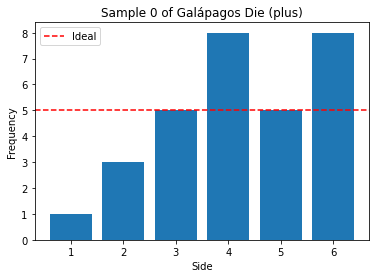

*********************************************
Sample 1 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 4  |
| 3: 4  |
| 4: 5  |
| 5: 4  |
| 6: 7  |
---------
X: 108
Sample mean: 3.6
P-value: 0.7484
Std: 1.8681
Deviation: 6.0


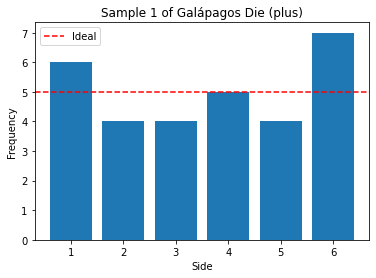

*********************************************
Sample 2 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 6  |
| 3: 5  |
| 4: 5  |
| 5: 4  |
| 6: 6  |
---------
X: 107
Sample mean: 3.566666666666667
P-value: 0.8307
Std: 1.7357
Deviation: 4.0


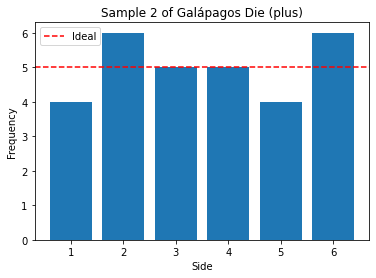

*********************************************
Sample 3 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 6  |
| 3: 5  |
| 4: 5  |
| 5: 5  |
| 6: 6  |
---------
X: 111
Sample mean: 3.7
P-value: 0.5212
Std: 1.6846
Deviation: 4.0


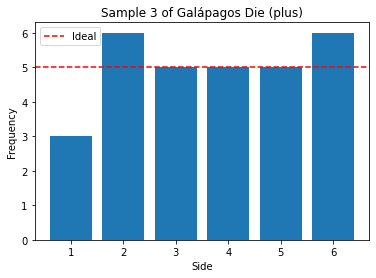

*********************************************
Sample 4 of Galápagos Die (plus)
---------
| 1: 2  |
| 2: 3  |
| 3: 5  |
| 4: 4  |
| 5: 7  |
| 6: 9  |
---------
X: 128
Sample mean: 4.266666666666667
P-value: 0.0139
Std: 1.6174
Deviation: 12.0


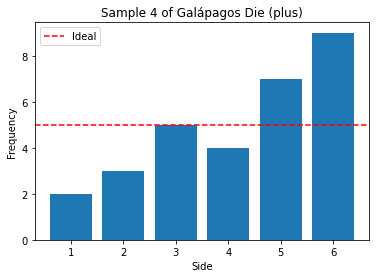

*********************************************
Sample 5 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 2  |
| 3: 5  |
| 4: 5  |
| 5: 4  |
| 6: 10 |
---------
X: 123
Sample mean: 4.1
P-value: 0.0543
Std: 1.7879
Deviation: 10.0


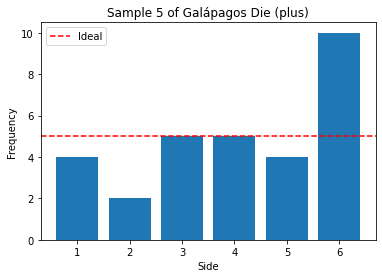

*********************************************
Sample 6 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 3  |
| 3: 8  |
| 4: 8  |
| 5: 3  |
| 6: 5  |
---------
X: 110
Sample mean: 3.6666666666666665
P-value: 0.5930
Std: 1.5162
Deviation: 12.0


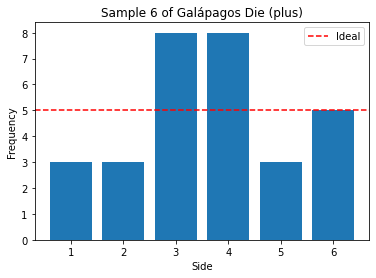

*********************************************
Sample 7 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 5  |
| 3: 3  |
| 4: 6  |
| 5: 3  |
| 6: 7  |
---------
X: 106
Sample mean: 3.533333333333333
P-value: 0.9149
Std: 1.8705
Deviation: 8.0


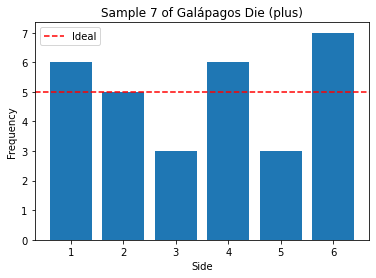

*********************************************
Sample 8 of Galápagos Die (plus)
---------
| 1: 7  |
| 2: 7  |
| 3: 6  |
| 4: 6  |
| 5: 1  |
| 6: 3  |
---------
X: 86
Sample mean: 2.8666666666666667
P-value: 0.0422
Std: 1.5698
Deviation: 12.0


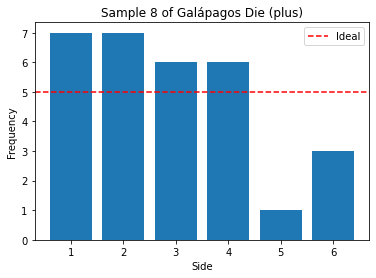

*********************************************
Sample 9 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 5  |
| 3: 2  |
| 4: 1  |
| 5: 5  |
| 6: 11 |
---------
X: 117
Sample mean: 3.9
P-value: 0.1995
Std: 2.0736
Deviation: 14.0


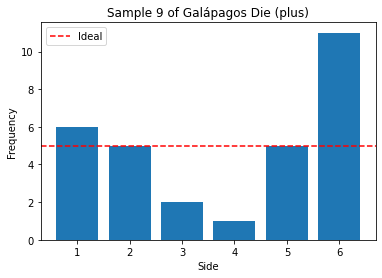

*********************************************
Sample 10 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 2  |
| 3: 7  |
| 4: 3  |
| 5: 6  |
| 6: 6  |
---------
X: 109
Sample mean: 3.6333333333333333
P-value: 0.6689
Std: 1.8096
Deviation: 10.0


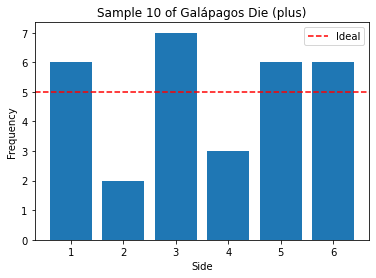

*********************************************
Sample 11 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 5  |
| 3: 5  |
| 4: 5  |
| 5: 7  |
| 6: 4  |
---------
X: 108
Sample mean: 3.6
P-value: 0.7484
Std: 1.6526
Deviation: 4.0


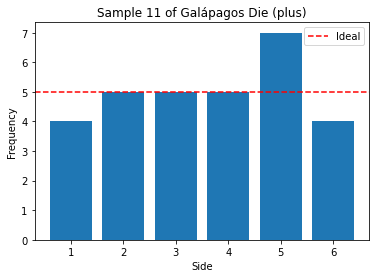

*********************************************
Sample 12 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 2  |
| 3: 4  |
| 4: 9  |
| 5: 4  |
| 6: 6  |
---------
X: 113
Sample mean: 3.7666666666666666
P-value: 0.3924
Std: 1.6955
Deviation: 10.0


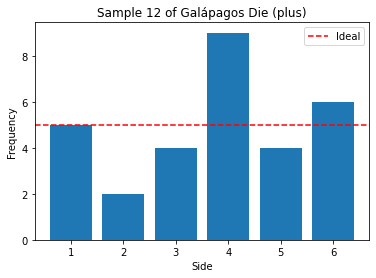

*********************************************
Sample 13 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 8  |
| 3: 5  |
| 4: 3  |
| 5: 3  |
| 6: 7  |
---------
X: 104
Sample mean: 3.466666666666667
P-value: 0.9149
Std: 1.8144
Deviation: 10.0


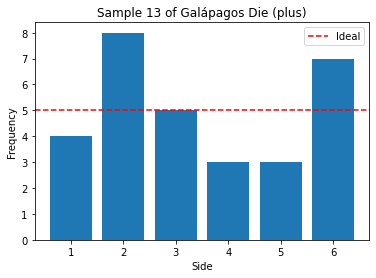

*********************************************
Sample 14 of Galápagos Die (plus)
---------
| 1: 2  |
| 2: 5  |
| 3: 6  |
| 4: 4  |
| 5: 9  |
| 6: 4  |
---------
X: 115
Sample mean: 3.8333333333333335
P-value: 0.2850
Std: 1.5332
Deviation: 10.0


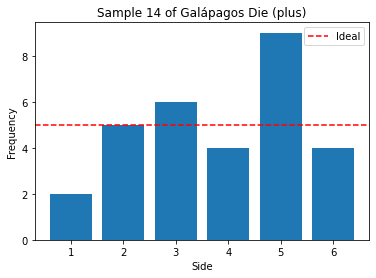

*********************************************
Sample 15 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 2  |
| 3: 5  |
| 4: 5  |
| 5: 5  |
| 6: 7  |
---------
X: 112
Sample mean: 3.7333333333333334
P-value: 0.4543
Std: 1.8370
Deviation: 6.0


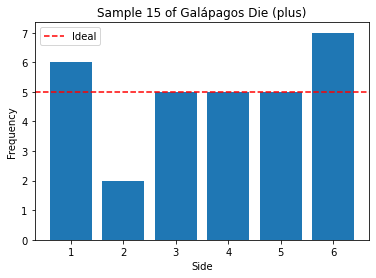

*********************************************
Sample 16 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 3  |
| 3: 8  |
| 4: 3  |
| 5: 9  |
| 6: 3  |
---------
X: 109
Sample mean: 3.6333333333333333
P-value: 0.6689
Std: 1.5862
Deviation: 14.0


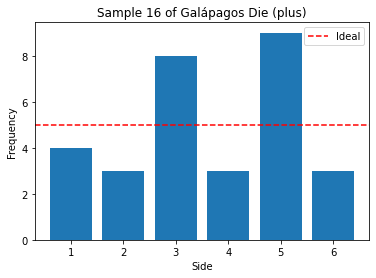

*********************************************
Sample 17 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 4  |
| 3: 5  |
| 4: 4  |
| 5: 11 |
| 6: 3  |
---------
X: 115
Sample mean: 3.8333333333333335
P-value: 0.2850
Std: 1.5555
Deviation: 12.0


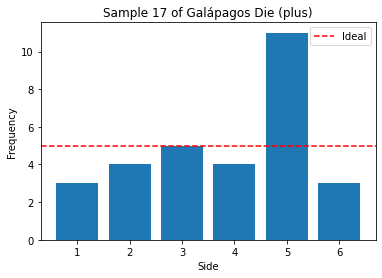

*********************************************
Sample 18 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 6  |
| 3: 6  |
| 4: 2  |
| 5: 6  |
| 6: 5  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.7750
Deviation: 6.0


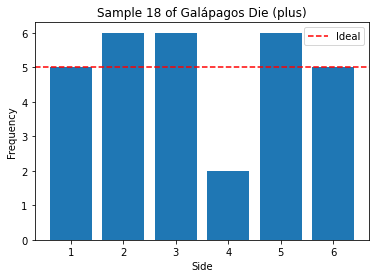

*********************************************
Sample 19 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 5  |
| 3: 4  |
| 4: 3  |
| 5: 10 |
| 6: 5  |
---------
X: 117
Sample mean: 3.9
P-value: 0.1995
Std: 1.6682
Deviation: 10.0


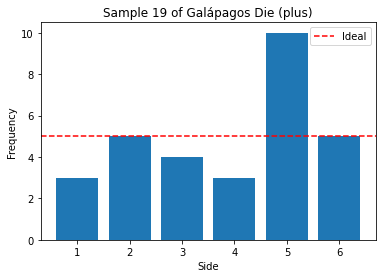

*********************************************
Sample 20 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 2  |
| 3: 5  |
| 4: 9  |
| 5: 5  |
| 6: 6  |
---------
X: 119
Sample mean: 3.966666666666667
P-value: 0.1345
Std: 1.5421
Deviation: 10.0


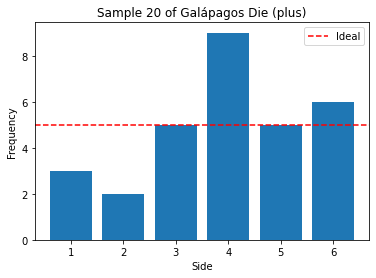

*********************************************
Sample 21 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 4  |
| 3: 1  |
| 4: 5  |
| 5: 9  |
| 6: 6  |
---------
X: 117
Sample mean: 3.9
P-value: 0.1995
Std: 1.8071
Deviation: 10.0


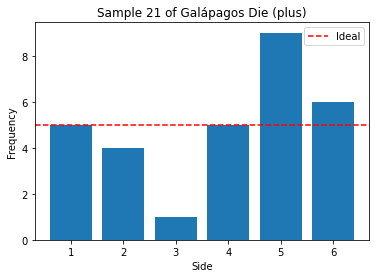

*********************************************
Sample 22 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 7  |
| 3: 2  |
| 4: 3  |
| 5: 8  |
| 6: 5  |
---------
X: 107
Sample mean: 3.566666666666667
P-value: 0.8307
Std: 1.8323
Deviation: 10.0


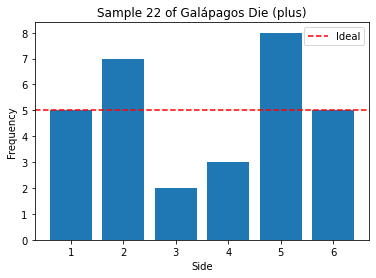

*********************************************
Sample 23 of Galápagos Die (plus)
---------
| 1: 2  |
| 2: 4  |
| 3: 3  |
| 4: 7  |
| 5: 9  |
| 6: 5  |
---------
X: 122
Sample mean: 4.066666666666666
P-value: 0.0692
Std: 1.5071
Deviation: 12.0


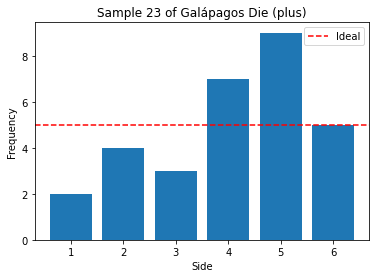

*********************************************
Sample 24 of Galápagos Die (plus)
---------
| 1: 4  |
| 2: 4  |
| 3: 4  |
| 4: 3  |
| 5: 10 |
| 6: 5  |
---------
X: 116
Sample mean: 3.8666666666666667
P-value: 0.2396
Std: 1.7167
Deviation: 10.0


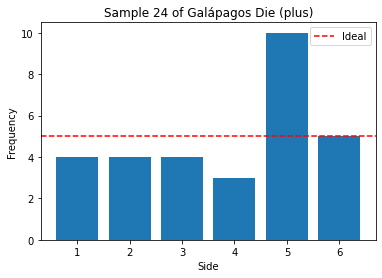

*********************************************
Sample 25 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 9  |
| 3: 6  |
| 4: 3  |
| 5: 3  |
| 6: 4  |
---------
X: 92
Sample mean: 3.066666666666667
P-value: 0.1646
Std: 1.6595
Deviation: 10.0


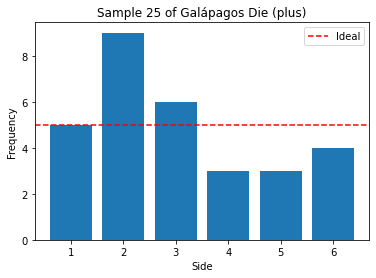

*********************************************
Sample 26 of Galápagos Die (plus)
---------
| 1: 2  |
| 2: 7  |
| 3: 7  |
| 4: 3  |
| 5: 7  |
| 6: 4  |
---------
X: 108
Sample mean: 3.6
P-value: 0.7484
Std: 1.5669
Deviation: 12.0


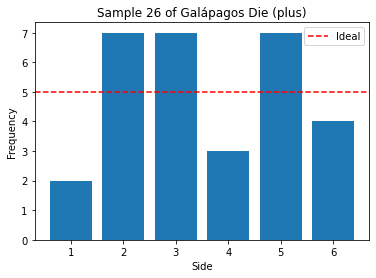

*********************************************
Sample 27 of Galápagos Die (plus)
---------
| 1: 8  |
| 2: 7  |
| 3: 4  |
| 4: 6  |
| 5: 1  |
| 6: 4  |
---------
X: 87
Sample mean: 2.9
P-value: 0.0543
Std: 1.7090
Deviation: 12.0


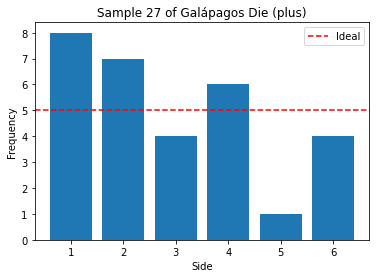

*********************************************
Sample 28 of Galápagos Die (plus)
---------
| 1: 8  |
| 2: 6  |
| 3: 3  |
| 4: 8  |
| 5: 3  |
| 6: 2  |
---------
X: 88
Sample mean: 2.933333333333333
P-value: 0.0692
Std: 1.6174
Deviation: 14.0


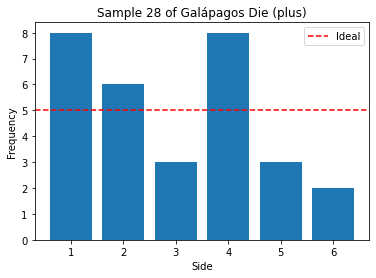

*********************************************
Sample 29 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 3  |
| 4: 9  |
| 5: 7  |
| 6: 6  |
---------
X: 118
Sample mean: 3.933333333333333
P-value: 0.1646
Std: 1.7407
Deviation: 9.0


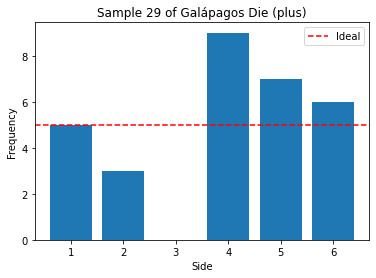

*********************************************
Sample 30 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 6  |
| 3: 3  |
| 4: 8  |
| 5: 5  |
| 6: 3  |
---------
X: 101
Sample mean: 3.3666666666666667
P-value: 0.6689
Std: 1.6291
Deviation: 8.0


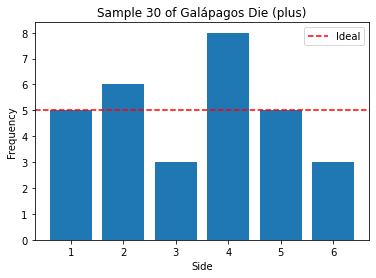

*********************************************
Sample 31 of Galápagos Die (plus)
---------
| 1: 2  |
| 2: 7  |
| 3: 6  |
| 4: 3  |
| 5: 6  |
| 6: 6  |
---------
X: 112
Sample mean: 3.7333333333333334
P-value: 0.4543
Std: 1.6595
Deviation: 10.0


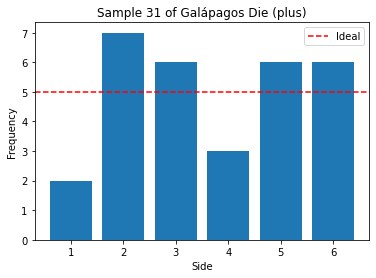

*********************************************
Sample 32 of Galápagos Die (plus)
---------
| 1: 5  |
| 2: 6  |
| 3: 4  |
| 4: 6  |
| 5: 4  |
| 6: 5  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.7357
Deviation: 4.0


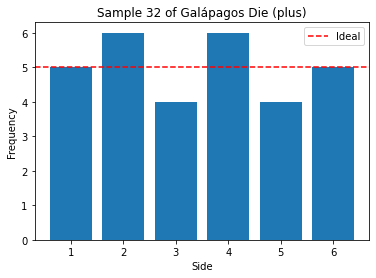

*********************************************
Sample 33 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 4  |
| 3: 5  |
| 4: 6  |
| 5: 5  |
| 6: 4  |
---------
X: 102
Sample mean: 3.4
P-value: 0.7484
Std: 1.7140
Deviation: 4.0


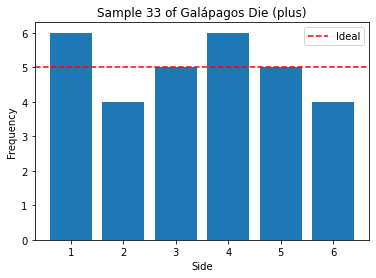

*********************************************
Sample 34 of Galápagos Die (plus)
---------
| 1: 8  |
| 2: 4  |
| 3: 9  |
| 4: 2  |
| 5: 6  |
| 6: 1  |
---------
X: 87
Sample mean: 2.9
P-value: 0.0543
Std: 1.5614
Deviation: 16.0


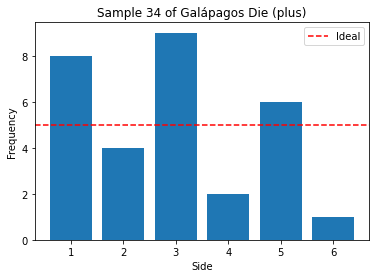

*********************************************
Sample 35 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 5  |
| 3: 4  |
| 4: 8  |
| 5: 2  |
| 6: 5  |
---------
X: 100
Sample mean: 3.3333333333333335
P-value: 0.5930
Std: 1.7287
Deviation: 8.0


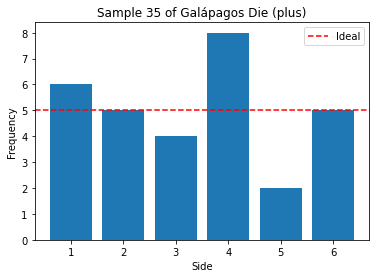

*********************************************
Sample 36 of Galápagos Die (plus)
---------
| 1: 1  |
| 2: 4  |
| 3: 9  |
| 4: 8  |
| 5: 3  |
| 6: 5  |
---------
X: 113
Sample mean: 3.7666666666666666
P-value: 0.3924
Std: 1.3817
Deviation: 14.0


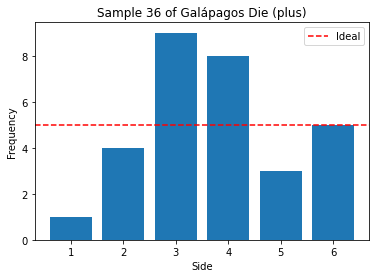

*********************************************
Sample 37 of Galápagos Die (plus)
---------
| 1: 6  |
| 2: 2  |
| 3: 7  |
| 4: 10 |
| 5: 3  |
| 6: 2  |
---------
X: 98
Sample mean: 3.2666666666666666
P-value: 0.4543
Std: 1.4840
Deviation: 16.0


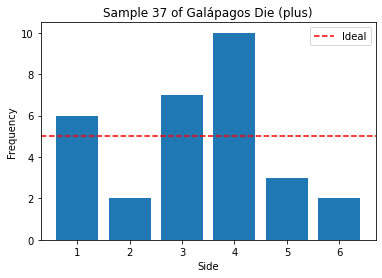

*********************************************
Sample 38 of Galápagos Die (plus)
---------
| 1: 3  |
| 2: 5  |
| 3: 4  |
| 4: 5  |
| 5: 8  |
| 6: 5  |
---------
X: 115
Sample mean: 3.8333333333333335
P-value: 0.2850
Std: 1.6418
Deviation: 6.0


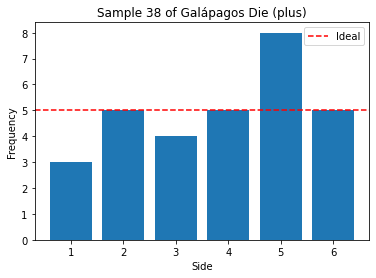

*********************************************
Sample 39 of Galápagos Die (plus)
---------
| 1: 7  |
| 2: 5  |
| 3: 6  |
| 4: 1  |
| 5: 6  |
| 6: 5  |
---------
X: 99
Sample mean: 3.3
P-value: 0.5212
Std: 1.8597
Deviation: 8.0


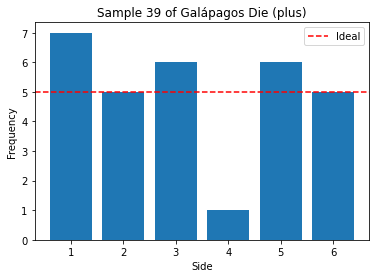

*********************************************


In [ ]:
plus_full = []
X_plus = []
p_plus = []
Z_plus = []

for i in range(len(plus)):
  print('*'*45)
  print(f'Sample {i} of Galápagos Die (plus)')

  print('-'*9)
  ct = collections.Counter(plus[i])
  count = collections.OrderedDict(sorted(ct.items()))
  plus_full.extend(plus[i])
  freq = []
  for key, value in count.items():
    if value > 9:
      print(f'| {key}: {value} |')
    else:
      print(f'| {key}: {value}  |')
    freq.append(value)
  print('-'*9)

  arr = np.array(plus[i])
  f = np.array(freq).sum()
  s = stats.tstd(arr)
  μ = f*7/2
  σ = np.sqrt(f*35/12)
  X = arr.sum()
  Z = (X - μ)/σ
  if X <= μ:
    p = 2*stats.norm.cdf(Z)
  else:
    p = 2*(1-stats.norm.cdf(Z))
  X_plus.append(X)
  p_plus.append(p)
  Z_plus.append(Z)
  
  dev = 0
  for key, value in count.items():
    dev += abs(f/6 - value)
  
  print('X:', X)
  print('Sample mean:', (X/f))
  print('P-value:', '%.4f' % p)
  print('Std:',  '%.4f' % s)
  print('Deviation:', dev)

  plt.bar(dict(count).keys(), dict(count).values())
  plt.axhline(y=f/6, color='r', linestyle='--')
  plt.legend(['Ideal'])
  plt.xlabel('Side')
  plt.ylabel('Frequency')
  plt.title(f'Sample {i} of Galápagos Die (plus)')
  plt.show()

print('*'*45)

*********************************************
Sample 0 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 5  |
| 3: 6  |
| 4: 2  |
| 5: 5  |
| 6: 6  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.8511
Deviation: 6.0


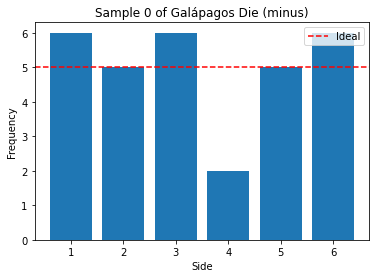

*********************************************
Sample 1 of Galápagos Die (minus)
---------
| 1: 5  |
| 2: 5  |
| 3: 5  |
| 4: 5  |
| 5: 7  |
| 6: 3  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.6543
Deviation: 4.0


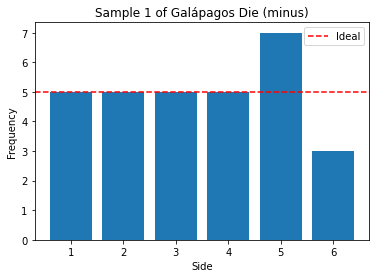

*********************************************
Sample 2 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 8  |
| 3: 6  |
| 4: 5  |
| 5: 3  |
| 6: 1  |
---------
X: 82
Sample mean: 2.7333333333333334
P-value: 0.0139
Std: 1.4368
Deviation: 12.0


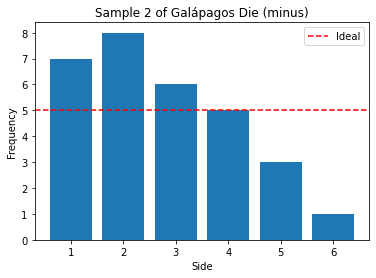

*********************************************
Sample 3 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 3  |
| 3: 6  |
| 4: 7  |
| 5: 4  |
| 6: 4  |
---------
X: 102
Sample mean: 3.4
P-value: 0.7484
Std: 1.6733
Deviation: 8.0


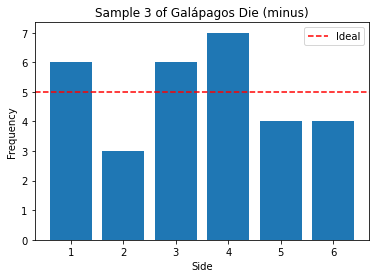

*********************************************
Sample 4 of Galápagos Die (minus)
---------
| 1: 5  |
| 2: 3  |
| 3: 4  |
| 4: 5  |
| 5: 5  |
| 6: 8  |
---------
X: 116
Sample mean: 3.8666666666666667
P-value: 0.2396
Std: 1.8333
Deviation: 6.0


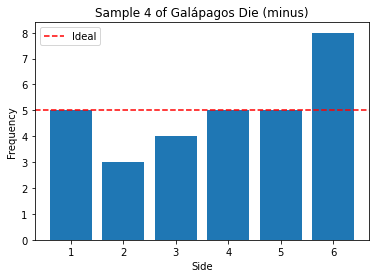

*********************************************
Sample 5 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 3  |
| 3: 2  |
| 4: 4  |
| 5: 11 |
| 6: 3  |
---------
X: 108
Sample mean: 3.6
P-value: 0.7484
Std: 1.8118
Deviation: 16.0


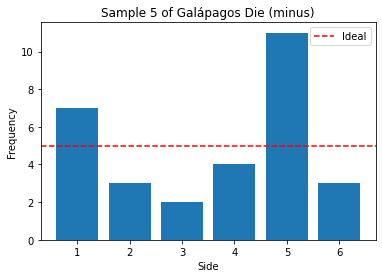

*********************************************
Sample 6 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 4  |
| 3: 8  |
| 4: 2  |
| 5: 7  |
| 6: 5  |
---------
X: 109
Sample mean: 3.6333333333333333
P-value: 0.6689
Std: 1.6914
Deviation: 10.0


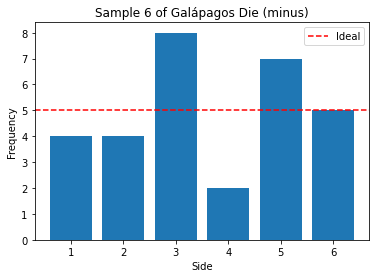

*********************************************
Sample 7 of Galápagos Die (minus)
---------
| 1: 5  |
| 2: 6  |
| 3: 8  |
| 4: 4  |
| 5: 2  |
| 6: 5  |
---------
X: 97
Sample mean: 3.2333333333333334
P-value: 0.3924
Std: 1.6750
Deviation: 8.0


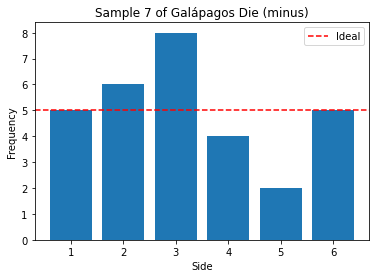

*********************************************
Sample 8 of Galápagos Die (minus)
---------
| 1: 2  |
| 2: 5  |
| 3: 6  |
| 4: 7  |
| 5: 4  |
| 6: 6  |
---------
X: 114
Sample mean: 3.8
P-value: 0.3360
Std: 1.5625
Deviation: 8.0


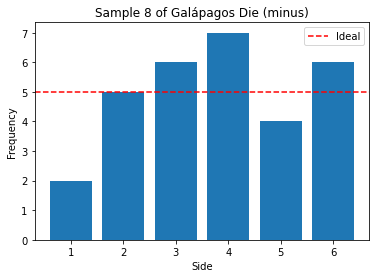

*********************************************
Sample 9 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 6  |
| 3: 3  |
| 4: 7  |
| 5: 6  |
| 6: 2  |
---------
X: 97
Sample mean: 3.2333333333333334
P-value: 0.3924
Std: 1.6333
Deviation: 10.0


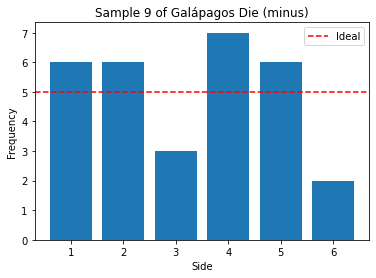

*********************************************
Sample 10 of Galápagos Die (minus)
---------
| 1: 9  |
| 2: 1  |
| 3: 6  |
| 4: 6  |
| 5: 6  |
| 6: 2  |
---------
X: 95
Sample mean: 3.1666666666666665
P-value: 0.2850
Std: 1.7036
Deviation: 14.0


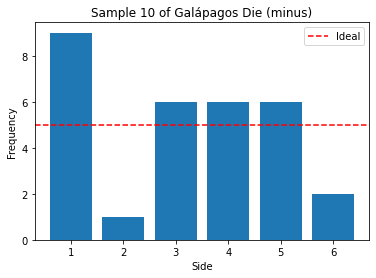

*********************************************
Sample 11 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 5  |
| 3: 3  |
| 4: 3  |
| 5: 4  |
| 6: 8  |
---------
X: 106
Sample mean: 3.533333333333333
P-value: 0.9149
Std: 1.9954
Deviation: 10.0


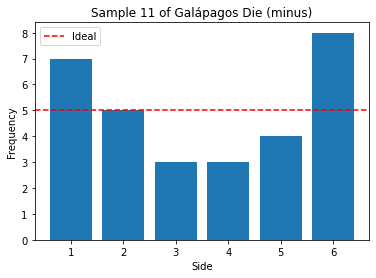

*********************************************
Sample 12 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 4  |
| 3: 6  |
| 4: 9  |
| 5: 3  |
| 6: 4  |
---------
X: 105
Sample mean: 3.5
P-value: 1.0000
Std: 1.5481
Deviation: 10.0


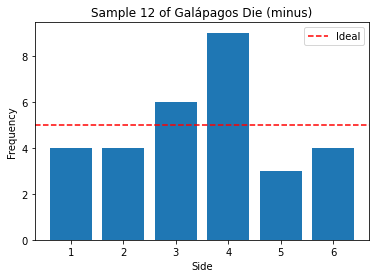

*********************************************
Sample 13 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 7  |
| 3: 3  |
| 4: 8  |
| 5: 4  |
| 6: 4  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.6333
Deviation: 10.0


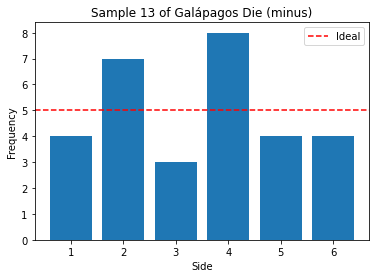

*********************************************
Sample 14 of Galápagos Die (minus)
---------
| 1: 3  |
| 2: 6  |
| 3: 8  |
| 4: 4  |
| 5: 2  |
| 6: 7  |
---------
X: 107
Sample mean: 3.566666666666667
P-value: 0.8307
Std: 1.6955
Deviation: 12.0


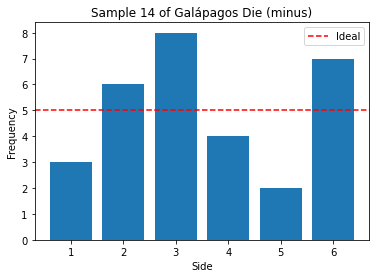

*********************************************
Sample 15 of Galápagos Die (minus)
---------
| 1: 5  |
| 2: 5  |
| 3: 5  |
| 4: 4  |
| 5: 6  |
| 6: 5  |
---------
X: 106
Sample mean: 3.533333333333333
P-value: 0.9149
Std: 1.7564
Deviation: 2.0


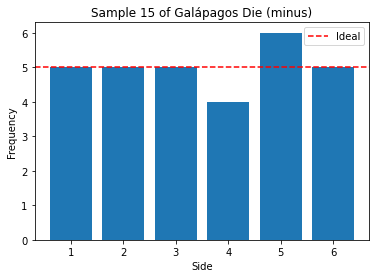

*********************************************
Sample 16 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 6  |
| 3: 2  |
| 4: 7  |
| 5: 7  |
| 6: 4  |
---------
X: 109
Sample mean: 3.6333333333333333
P-value: 0.6689
Std: 1.6709
Deviation: 10.0


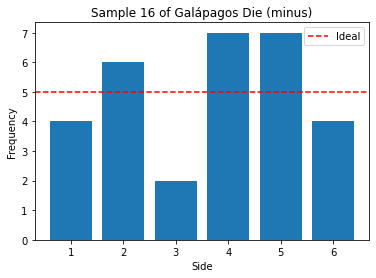

*********************************************
Sample 17 of Galápagos Die (minus)
---------
| 1: 1  |
| 2: 3  |
| 3: 6  |
| 4: 8  |
| 5: 6  |
| 6: 6  |
---------
X: 123
Sample mean: 4.1
P-value: 0.0543
Std: 1.3983
Deviation: 12.0


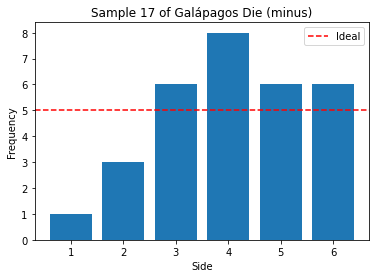

*********************************************
Sample 18 of Galápagos Die (minus)
---------
| 1: 3  |
| 2: 4  |
| 3: 4  |
| 4: 6  |
| 5: 8  |
| 6: 5  |
---------
X: 117
Sample mean: 3.9
P-value: 0.1995
Std: 1.6049
Deviation: 8.0


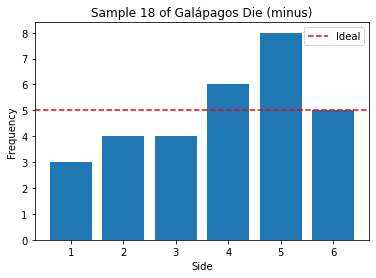

*********************************************
Sample 19 of Galápagos Die (minus)
---------
| 1: 3  |
| 2: 5  |
| 3: 4  |
| 4: 7  |
| 5: 4  |
| 6: 7  |
---------
X: 115
Sample mean: 3.8333333333333335
P-value: 0.2850
Std: 1.6833
Deviation: 8.0


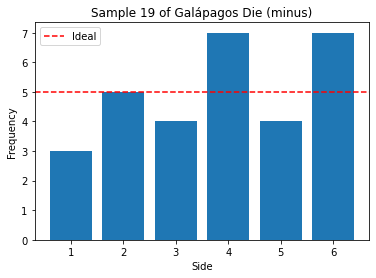

*********************************************
Sample 20 of Galápagos Die (minus)
---------
| 1: 5  |
| 2: 5  |
| 3: 6  |
| 4: 4  |
| 5: 5  |
| 6: 5  |
---------
X: 104
Sample mean: 3.466666666666667
P-value: 0.9149
Std: 1.7367
Deviation: 2.0


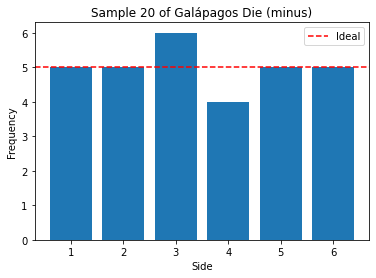

*********************************************
Sample 21 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 3  |
| 3: 2  |
| 4: 6  |
| 5: 7  |
| 6: 8  |
---------
X: 123
Sample mean: 4.1
P-value: 0.0543
Std: 1.7489
Deviation: 12.0


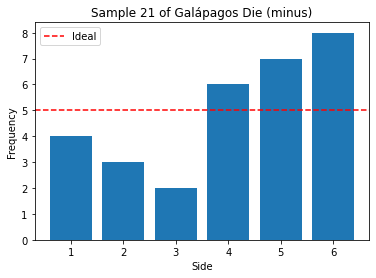

*********************************************
Sample 22 of Galápagos Die (minus)
---------
| 1: 1  |
| 2: 4  |
| 3: 3  |
| 4: 5  |
| 5: 11 |
| 6: 6  |
---------
X: 129
Sample mean: 4.3
P-value: 0.0103
Std: 1.4420
Deviation: 14.0


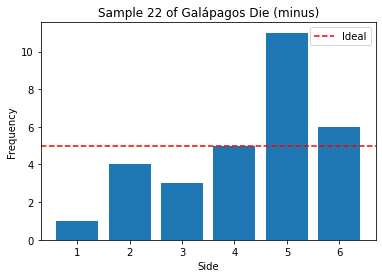

*********************************************
Sample 23 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 3  |
| 3: 5  |
| 4: 5  |
| 5: 5  |
| 6: 6  |
---------
X: 108
Sample mean: 3.6
P-value: 0.7484
Std: 1.8118
Deviation: 4.0


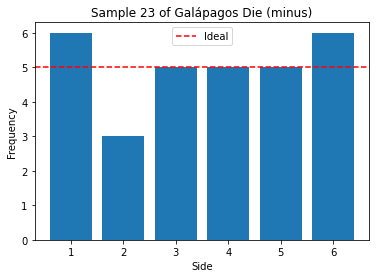

*********************************************
Sample 24 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 5  |
| 3: 7  |
| 4: 4  |
| 5: 4  |
| 6: 4  |
---------
X: 97
Sample mean: 3.2333333333333334
P-value: 0.3924
Std: 1.6955
Deviation: 6.0


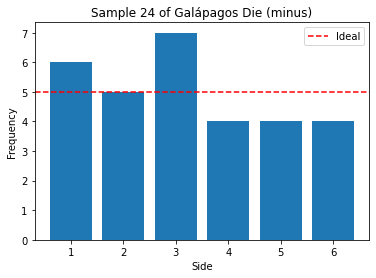

*********************************************
Sample 25 of Galápagos Die (minus)
---------
| 1: 8  |
| 2: 6  |
| 3: 3  |
| 4: 3  |
| 5: 3  |
| 6: 7  |
---------
X: 98
Sample mean: 3.2666666666666666
P-value: 0.4543
Std: 1.9815
Deviation: 12.0


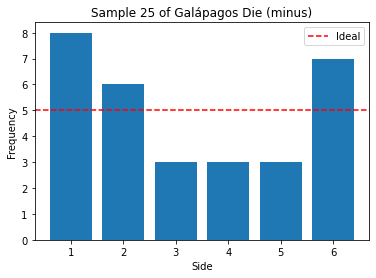

*********************************************
Sample 26 of Galápagos Die (minus)
---------
| 1: 3  |
| 2: 5  |
| 3: 7  |
| 4: 2  |
| 5: 6  |
| 6: 7  |
---------
X: 114
Sample mean: 3.8
P-value: 0.3360
Std: 1.7301
Deviation: 10.0


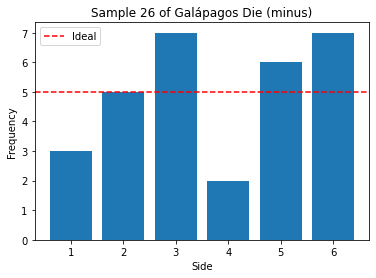

*********************************************
Sample 27 of Galápagos Die (minus)
---------
| 2: 4  |
| 3: 5  |
| 4: 6  |
| 5: 10 |
| 6: 5  |
---------
X: 127
Sample mean: 4.233333333333333
P-value: 0.0187
Std: 1.3047
Deviation: 7.0


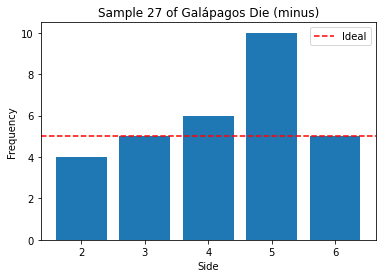

*********************************************
Sample 28 of Galápagos Die (minus)
---------
| 1: 2  |
| 2: 8  |
| 3: 9  |
| 4: 3  |
| 5: 2  |
| 6: 6  |
---------
X: 103
Sample mean: 3.433333333333333
P-value: 0.8307
Std: 1.6121
Deviation: 16.0


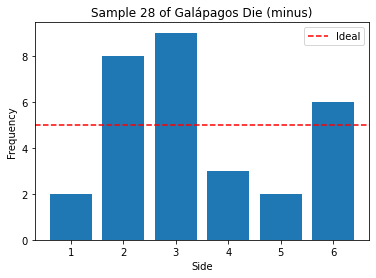

*********************************************
Sample 29 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 4  |
| 3: 6  |
| 4: 5  |
| 5: 5  |
| 6: 6  |
---------
X: 111
Sample mean: 3.7
P-value: 0.5212
Std: 1.7050
Deviation: 4.0


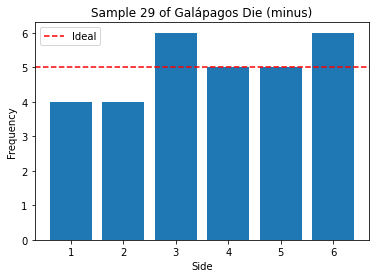

*********************************************
Sample 30 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 9  |
| 3: 4  |
| 4: 2  |
| 5: 4  |
| 6: 4  |
---------
X: 89
Sample mean: 2.966666666666667
P-value: 0.0872
Std: 1.7711
Deviation: 12.0


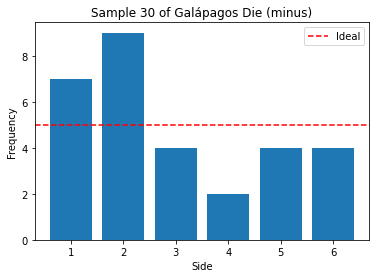

*********************************************
Sample 31 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 7  |
| 3: 4  |
| 4: 3  |
| 5: 7  |
| 6: 5  |
---------
X: 107
Sample mean: 3.566666666666667
P-value: 0.8307
Std: 1.7555
Deviation: 8.0


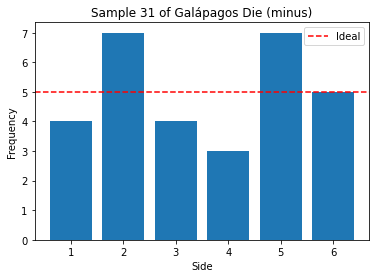

*********************************************
Sample 32 of Galápagos Die (minus)
---------
| 1: 6  |
| 2: 4  |
| 3: 4  |
| 4: 6  |
| 5: 5  |
| 6: 5  |
---------
X: 105
Sample mean: 3.5
P-value: 1.0000
Std: 1.7763
Deviation: 4.0


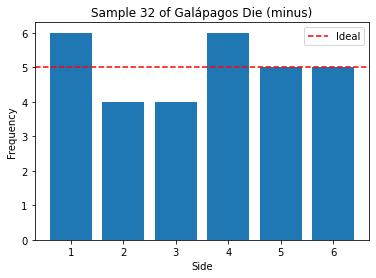

*********************************************
Sample 33 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 6  |
| 3: 5  |
| 5: 9  |
| 6: 6  |
---------
X: 112
Sample mean: 3.7333333333333334
P-value: 0.4543
Std: 1.8182
Deviation: 7.0


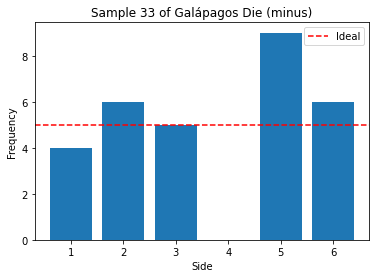

*********************************************
Sample 34 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 3  |
| 3: 8  |
| 4: 4  |
| 5: 4  |
| 6: 7  |
---------
X: 112
Sample mean: 3.7333333333333334
P-value: 0.4543
Std: 1.7207
Deviation: 10.0


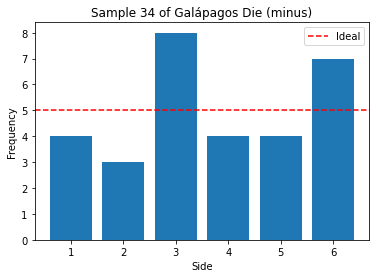

*********************************************
Sample 35 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 8  |
| 3: 2  |
| 4: 2  |
| 5: 5  |
| 6: 6  |
---------
X: 98
Sample mean: 3.2666666666666666
P-value: 0.4543
Std: 1.9464
Deviation: 12.0


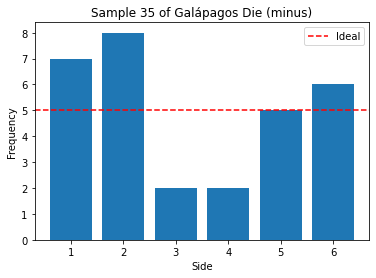

*********************************************
Sample 36 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 6  |
| 3: 4  |
| 4: 3  |
| 5: 7  |
| 6: 6  |
---------
X: 111
Sample mean: 3.7
P-value: 0.5212
Std: 1.7840
Deviation: 8.0


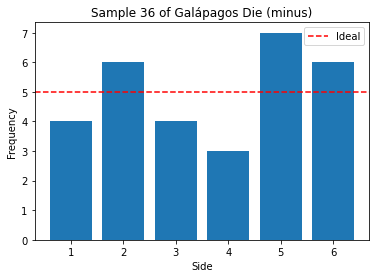

*********************************************
Sample 37 of Galápagos Die (minus)
---------
| 1: 7  |
| 2: 4  |
| 3: 6  |
| 4: 5  |
| 5: 2  |
| 6: 6  |
---------
X: 99
Sample mean: 3.3
P-value: 0.5212
Std: 1.8223
Deviation: 8.0


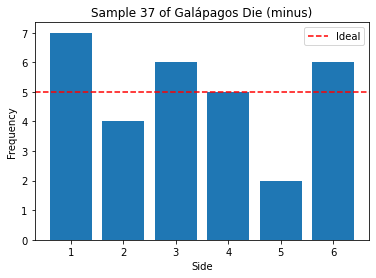

*********************************************
Sample 38 of Galápagos Die (minus)
---------
| 1: 4  |
| 2: 9  |
| 3: 5  |
| 4: 5  |
| 6: 7  |
---------
X: 99
Sample mean: 3.3
P-value: 0.5212
Std: 1.7646
Deviation: 7.0


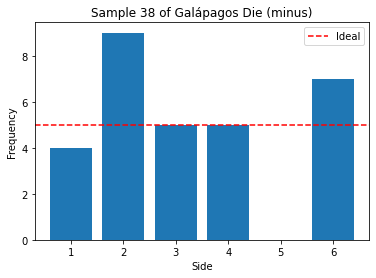

*********************************************
Sample 39 of Galápagos Die (minus)
---------
| 1: 1  |
| 2: 6  |
| 3: 4  |
| 4: 2  |
| 5: 11 |
| 6: 6  |
---------
X: 124
Sample mean: 4.133333333333334
P-value: 0.0422
Std: 1.5698
Deviation: 16.0


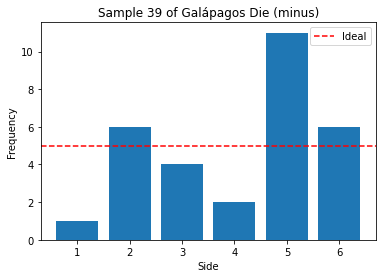

*********************************************


In [ ]:
minus_full = []
X_minus = []
p_minus = []
Z_minus = []

for i in range(len(minus)):
  print('*'*45)
  print(f'Sample {i} of Galápagos Die (minus)')

  print('-'*9)
  ct = collections.Counter(minus[i])
  count = collections.OrderedDict(sorted(ct.items()))
  minus_full.extend(minus[i])
  freq = []
  for key, value in count.items():
    if value > 9:
      print(f'| {key}: {value} |')
    else:
      print(f'| {key}: {value}  |')
    freq.append(value)
  print('-'*9)

  arr = np.array(minus[i])
  f = np.array(freq).sum()
  s = stats.tstd(arr)
  μ = f*7/2
  σ = np.sqrt(f*35/12)
  X = arr.sum()
  Z = (X - μ)/σ
  if X <= μ:
    p = 2*stats.norm.cdf(Z)
  else:
    p = 2*(1-stats.norm.cdf(Z))
  X_minus.append(X)
  p_minus.append(p)
  Z_minus.append(Z)

  dev = 0
  for key, value in count.items():
    dev += abs(f/6 - value)

  print('X:', X)
  print('Sample mean:', (X/f))
  print('P-value:', '%.4f' % p)
  print('Std:', '%.4f' % s)
  print('Deviation:', dev)

  plt.bar(dict(count).keys(), dict(count).values())
  plt.axhline(y=f/6, color='r', linestyle='--')
  plt.legend(['Ideal'])
  plt.xlabel('Side')
  plt.ylabel('Frequency')
  plt.title(f'Sample {i} of Galápagos Die (minus)')
  plt.show()

print('*'*45)

# P-Values

In [ ]:
print('mean P-value (plus):', '%.4f' % np.array(p_plus).mean())
print('mean p-value (minus):', '%.4f' % np.array(p_minus).mean())

mean P-value (plus): 0.4266
mean p-value (minus): 0.5088


In [ ]:
print('mean sum of the samples (plus):', np.array(X_plus).mean())
print('mean sum of the samples (minus):', np.array(X_minus).mean())

mean sum of the samples (plus): 108.3
mean sum of the samples (minus): 107.175


In [ ]:
μ = 30*7/2
σ = np.sqrt(30*35/12)
X = np.array(X_plus).mean()
Z = (X - μ)/σ
if X <= μ:
  p = 2*stats.norm.cdf(Z)
else:
  p = 2*(1-stats.norm.cdf(Z))
print('p-value mean (plus):', '%.4f' % p)

μ = 30*7/2
σ = np.sqrt(30*35/12)
X = np.array(X_minus).mean()
Z = (X - μ)/σ
if X <= μ:
  p = 2*stats.norm.cdf(Z)
else:
  p = 2*(1-stats.norm.cdf(Z))
print('p-value mean (minus):', '%.4f' % p)

p-value mean (plus): 0.7242
p-value mean (minus): 0.8161


# Full Sample

*********************************************
Full sample of Galápagos Die (plus)
----------
| 1: 180 |
| 2: 187 |
| 3: 195 |
| 4: 207 |
| 5: 221 |
| 6: 210 |
----------
X: 4332
Mean: 3.6100
P-value: 0.0257
Std: 1.6942
Deviation: 76.0


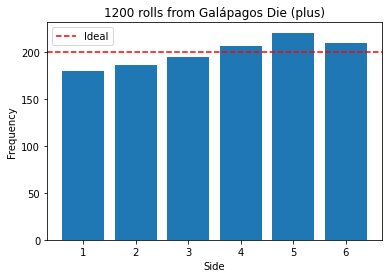

*********************************************


In [ ]:
print('*'*45)
print('Full sample of Galápagos Die (plus)')

count = collections.Counter(plus_full)
count_plus = collections.OrderedDict(sorted(count.items()))
freq_plus = []
print('-'*10)
for key, value in count_plus.items():
  print(f'| {key}: {value} |')
  freq_plus.append(value)
print('-'*10)

arr = np.array(plus_full)
f = np.array(freq_plus).sum()
s = stats.tstd(arr)
μ = f*7/2
σ = np.sqrt(f*35/12)
X = arr.sum()
Z = (X - μ)/σ
if X <= μ:
  p = 2*stats.norm.cdf(Z)
else:
  p = 2*(1-stats.norm.cdf(Z))

dev = 0
for key, value in count.items():
  dev += abs(f/6 - value)

print('X:', X)
print('Mean:', '%.4f' % (X/f))
print('P-value:', '%.4f' % p)
print('Std:', '%.4f' % s)
print('Deviation:', dev)

plt.bar(dict(count_plus).keys(), dict(count_plus).values())
plt.axhline(y=f/6, color='r', linestyle='--')
plt.legend(['Ideal'])
plt.xlabel('Side')
plt.ylabel('Frequency')
plt.title(str(f) + ' rolls from Galápagos Die (plus)')
plt.show()

print('*'*45)

*********************************************
Full sample of Galápagos Die (minus)
----------
| 1: 183 |
| 2: 203 |
| 3: 200 |
| 4: 185 |
| 5: 216 |
| 6: 213 |
----------
X: 4287
Mean: 3.5725
P-value: 0.1414
Std: 1.7104
Deviation: 64.0


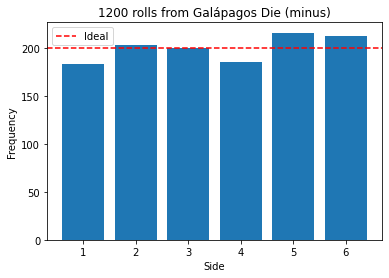

*********************************************


In [ ]:
print('*'*45)
print('Full sample of Galápagos Die (minus)')

count = collections.Counter(minus_full)
count_minus = collections.OrderedDict(sorted(count.items()))
freq_minus = []
print('-'*10)
for key, value in count_minus.items():
  print(f'| {key}: {value} |')
  freq_minus.append(value)
print('-'*10)

arr = np.array(minus_full)
f = np.array(freq_minus).sum()
s = stats.tstd(arr)
μ = f*7/2
σ = np.sqrt(f*35/12)
X = arr.sum()
Z = (X - μ)/σ
if X <= μ:
  p = 2*stats.norm.cdf(Z)
else:
  p = 2*(1-stats.norm.cdf(Z))

dev = 0
for key, value in count.items():
  dev += abs(f/6 - value)

print('X:', X)
print('Mean:', '%.4f' % (X/f))
print('P-value:', '%.4f' % p)
print('Std:', '%.4f' % s)
print('Deviation:', dev)

plt.bar(dict(count_minus).keys(), dict(count_minus).values())
plt.axhline(y=f/6, color='r', linestyle='--')
plt.legend(['Ideal'])
plt.xlabel('Side')
plt.ylabel('Frequency')
plt.title(str(f) + ' rolls from Galápagos Die (minus)')
plt.show()

print('*'*45)

# Χ² test

H0: The frequencies of each side of the die are equally likely.

H1: One or more sides of the dice has frequency significantly different from the other sides.

In [ ]:
critical = [0.85, 0.9, 0.95, 0.975, 0.99]
statistic, p_value = stats.chisquare(freq_plus)
print(f'Χ² = {statistic}') 
for crit in critical:
  print('')
  if statistic < stats.chi2.ppf(crit, 5):
    print(f'Fail to reject H0 by critical value with {100*crit}% confidence.')
  else:
    print(f'Reject H0 by critical value with {100*crit}% confidence.')
  if p_value < (1-crit):
    print(f'Reject H0 by p-value with {100*crit}% confidence.')
  else:
    print(f'Fail to reject H0 by p-value with {100*crit}% confidence.')

Χ² = 5.92

Fail to reject H0 by critical value with 85.0% confidence.
Fail to reject H0 by p-value with 85.0% confidence.

Fail to reject H0 by critical value with 90.0% confidence.
Fail to reject H0 by p-value with 90.0% confidence.

Fail to reject H0 by critical value with 95.0% confidence.
Fail to reject H0 by p-value with 95.0% confidence.

Fail to reject H0 by critical value with 97.5% confidence.
Fail to reject H0 by p-value with 97.5% confidence.

Fail to reject H0 by critical value with 99.0% confidence.
Fail to reject H0 by p-value with 99.0% confidence.


In [ ]:
critical = [0.85, 0.9, 0.95, 0.975, 0.99]
statistic, p_value = stats.chisquare(freq_minus)
print(f'Χ² = {statistic}') 
for crit in critical:
  print('')
  if statistic < stats.chi2.ppf(crit, 5):
    print(f'Fail to reject H0 by critical value with {100*crit}% confidence.')
  else:
    print(f'Reject H0 by critical value with {100*crit}% confidence.')
  if p_value < (1-crit):
    print(f'Reject H0 by p-value with {100*crit}% confidence.')
  else:
    print(f'Fail to reject H0 by p-value with {100*crit}% confidence.')

Χ² = 4.74

Fail to reject H0 by critical value with 85.0% confidence.
Fail to reject H0 by p-value with 85.0% confidence.

Fail to reject H0 by critical value with 90.0% confidence.
Fail to reject H0 by p-value with 90.0% confidence.

Fail to reject H0 by critical value with 95.0% confidence.
Fail to reject H0 by p-value with 95.0% confidence.

Fail to reject H0 by critical value with 97.5% confidence.
Fail to reject H0 by p-value with 97.5% confidence.

Fail to reject H0 by critical value with 99.0% confidence.
Fail to reject H0 by p-value with 99.0% confidence.


# Anderson-Darling test

H0: The standardized sum of the values for each sample of the die are normally distributed.

H1: The standardized sum of the values for each sample of the die follows another distribution.

In [ ]:
statistic, crit, sign = stats.anderson(Z_plus, 'norm')
print(f"A² = {'%.4f' % statistic}") 
print('')
for i in range(len(sign)):
  if statistic < crit[i]:
    print(f'Fail to reject H0 with {100-sign[i]}% confidence.')
  else:
    print(f'Reject H0 with {100-sign[i]}% confidence.')

A² = 0.4785

Fail to reject H0 with 85.0% confidence.
Fail to reject H0 with 90.0% confidence.
Fail to reject H0 with 95.0% confidence.
Fail to reject H0 with 97.5% confidence.
Fail to reject H0 with 99.0% confidence.


In [ ]:
statistic, crit, sign = stats.anderson(Z_minus, 'norm')
print(f"A² = {'%.4f' % statistic}") 
print('')
for i in range(len(sign)):
  if statistic < crit[i]:
    print(f'Fail to reject H0 with {100-sign[i]}% confidence.')
  else:
    print(f'Reject H0 with {100-sign[i]}% confidence.')

A² = 0.3270

Fail to reject H0 with 85.0% confidence.
Fail to reject H0 with 90.0% confidence.
Fail to reject H0 with 95.0% confidence.
Fail to reject H0 with 97.5% confidence.
Fail to reject H0 with 99.0% confidence.
